In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [5]:
# Step 1: Load the dataset
# The dataset "Original_data_with_more_rows.csv" and "Expanded_data_with_more_features.csv" are downloaded from Kaggle
# It contains raw data related to student performance,
# parental education levels, family status, and other demographic factors.
data_org = pd.read_csv('Original_data_with_more_rows.csv')

# Drop the 'Unnamed: 0' column from the dataset
data_org = data_org.drop('Unnamed: 0', axis=1)

# Create an auto-incrementing ID column for data_org
# The 'StudentID' column is generated to uniquely identify each record in the dataset.
data_org['StudentID'] = range(1, len(data_org) + 1)
# Display the first few rows to understand the data structure
print(data_org.head())

   Gender EthnicGroup          ParentEduc     LunchType   TestPrep  MathScore  \
0  female     group B   bachelor's degree      standard       none         72   
1  female     group C        some college      standard  completed         69   
2  female     group B     master's degree      standard       none         90   
3    male     group A  associate's degree  free/reduced       none         47   
4    male     group C        some college      standard       none         76   

   ReadingScore  WritingScore  StudentID  
0            72            74          1  
1            90            88          2  
2            95            93          3  
3            57            44          4  
4            78            75          5  


In [6]:
# Load the dataset
data_extended = pd.read_csv('Expanded_data_with_more_features.csv')

# Drop the 'Unnamed: 0' column from the dataset
data_extended = data_extended.drop('Unnamed: 0', axis=1)

# Create an auto-incrementing ID column for data_org
# The 'StudentID' column is generated to uniquely identify each record in the dataset.
data_extended['StudentID'] = range(1, len(data_extended) + 1)
# Display the first few rows to understand the data structure
print(data_extended.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  StudentID  
0            < 5         71            71      

In [7]:
# Merge two datasets
# The data_org and data_extended datasets are merged based on the 'StudentID' column.
# The 'inner' join method is used, meaning only rows with matching 'StudentID' 
# in both datasets will be included in the resulting dataset.

merged_data = pd.merge(data_org, data_extended, on='StudentID', how='inner')

In [8]:
# Identify duplicate columns (columns with '_x' and '_y' suffixes from merging)
duplicate_columns = [col for col in merged_data.columns if '_y' in col]

# Resolve duplicate columns by keeping the first dataset's values
for col in duplicate_columns:
    base_col = col.replace('_y', '')  # Get the original column name
    if base_col + '_x' in merged_data.columns:  # Ensure the first dataset's column exists
        merged_data[base_col] = merged_data[base_col + '_x']  # Use values from the first dataset
    else:
        merged_data[base_col] = merged_data[col]  # Use '_y' values if '_x' is not present

# Remove all '_x' and '_y' columns after resolving duplicates
merged_data = merged_data.drop(columns=[col for col in merged_data.columns if '_x' in col or '_y' in col])

# Display the first few rows of the cleaned dataset
print(merged_data.head())

   StudentID ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0          1             married     regularly          yes         3.0   
1          2             married     sometimes          yes         0.0   
2          3              single     sometimes          yes         4.0   
3          4             married         never           no         1.0   
4          5             married     sometimes          yes         0.0   

  TransportMeans WklyStudyHours  Gender EthnicGroup          ParentEduc  \
0     school_bus            < 5  female     group B   bachelor's degree   
1            NaN         5 - 10  female     group C        some college   
2     school_bus            < 5  female     group B     master's degree   
3            NaN         5 - 10    male     group A  associate's degree   
4     school_bus         5 - 10    male     group C        some college   

      LunchType   TestPrep  MathScore  ReadingScore  WritingScore  
0      standard       none    

In [9]:
# Correcting data type from float64 to int
merged_data['NrSiblings'] = merged_data['NrSiblings'].astype(pd.Int64Dtype())
merged_data['NrSiblings'].dtypes

Int64Dtype()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'some college'),
  Text(1, 0, 'high school'),
  Text(2, 0, "associate's degree"),
  Text(3, 0, 'some high school'),
  Text(4, 0, "bachelor's degree"),
  Text(5, 0, "master's degree")])

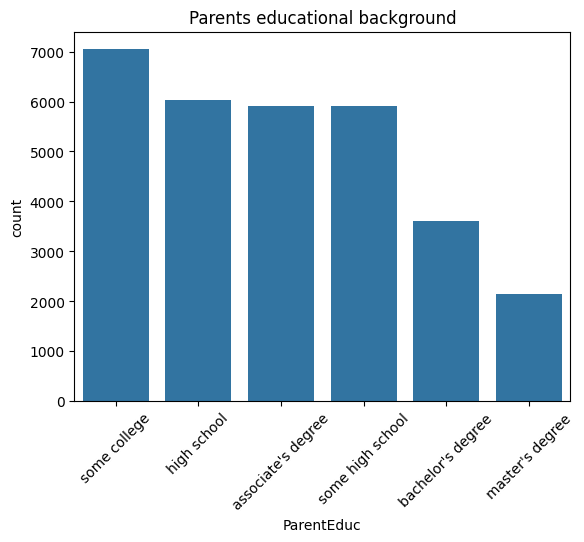

In [10]:
sns.countplot(x=merged_data['ParentEduc'], \
              order=['some college', 'high school', "associate's degree", 'some high school', "bachelor's degree", "master's degree"])
plt.title('Parents educational background')
plt.xticks(rotation=45)

In [11]:
def display_stats(df, col):
    '''
    Given a dataFrame and the column name, this function calculates and returns two stats summary dataframes. 
    - A normalized value_counts of the categories in the given columns "col" and 
    - A sorted mean of the three test scores grouped by the categories in column "col"    
    '''
    
    val_cnt = df[col].value_counts().to_frame(name=col + ' (count)')
    val_cnt_norm = df[col].value_counts(normalize=True).mul(100).to_frame(name=col + ' (%)')
    
    val_cnt_table = pd.concat([val_cnt, val_cnt_norm], axis=1)
    
    mean_score_summary = df.groupby([col])[['MathScore', 'ReadingScore', 'WritingScore']]\
    .agg(np.mean).sort_values(by='MathScore', ascending=False)
    
    return display(val_cnt_table, mean_score_summary)

In [12]:
display_stats(merged_data, 'ParentEduc')

C:\Users\yanh8\AppData\Local\Temp\ipykernel_13132\1492059652.py:14: FutureWarning: The provided callable <function mean at 0x000001C55B5372E0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(np.mean).sort_values(by='MathScore', ascending=False)


,ParentEduc (count),ParentEduc (%)
ParentEduc,,
some college,7048,23.001860
high school,6031,19.682778
some high school,5907,19.278091
associate's degree,5902,19.261773
bachelor's degree,3600,11.748964
master's degree,2153,7.026533


,MathScore,ReadingScore,WritingScore
ParentEduc,,,
master's degree,72.168137,75.202044,75.246168
bachelor's degree,70.635000,73.375556,73.423611
associate's degree,68.527787,71.368350,70.374619
some college,66.603434,69.528093,68.653661
high school,64.670038,67.522467,65.565909
some high school,62.926359,65.826816,63.815473


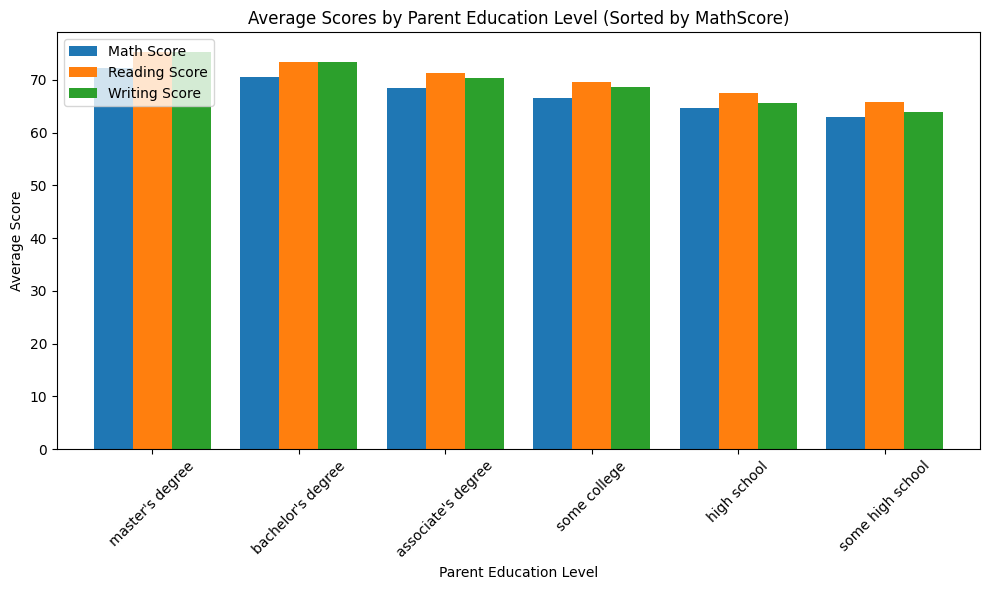

In [13]:
# Calculate the average scores and sort by MathScore in descending order
mean_score_summary = (
    merged_data.groupby('ParentEduc')[['MathScore', 'ReadingScore', 'WritingScore']]
    .mean()
    .sort_values(by='MathScore', ascending=False)  # Sort by MathScore in descending order
)

# Plot the bar chart
mean_score_summary.plot(kind='bar', figsize=(10, 6), width=0.8)

# Set chart titles and labels
plt.title('Average Scores by Parent Education Level (Sorted by MathScore)')
plt.xlabel('Parent Education Level')
plt.ylabel('Average Score')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.legend(['Math Score', 'Reading Score', 'Writing Score'], loc='upper left')
plt.tight_layout()  # Adjust layout to avoid overlapping elements

# Display the chart
plt.show()


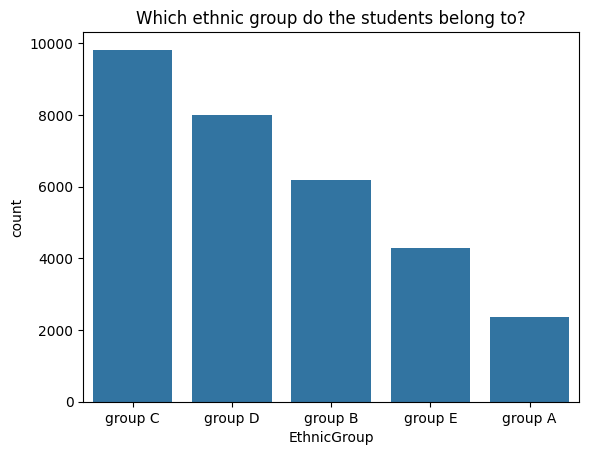

In [14]:
sns.countplot(x=merged_data['EthnicGroup'], \
              order=['group C', 'group D', 'group B', 'group E', 'group A'])
plt.title('Which ethnic group do the students belong to?');

In [15]:
display_stats(merged_data,'EthnicGroup')

C:\Users\yanh8\AppData\Local\Temp\ipykernel_13132\1492059652.py:14: FutureWarning: The provided callable <function mean at 0x000001C55B5372E0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(np.mean).sort_values(by='MathScore', ascending=False)


,EthnicGroup (count),EthnicGroup (%)
EthnicGroup,,
group C,9816,32.035508
group D,7986,26.063118
group B,6192,20.208218
group E,4288,13.994321
group A,2359,7.698835


,MathScore,ReadingScore,WritingScore
EthnicGroup,,,
group E,75.480644,74.490672,72.725280
group D,67.807914,70.573378,70.838217
group C,64.880705,68.656377,67.028015
group B,63.686208,67.584625,65.982881
group A,63.110640,66.955914,65.224671


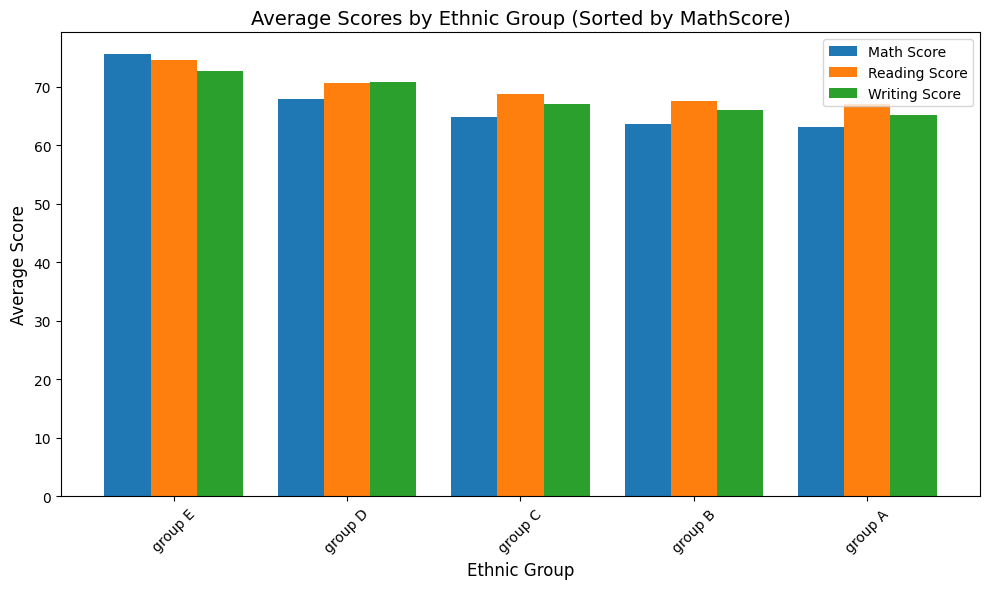

In [16]:
# Calculate the average scores for each EthnicGroup and sort by MathScore in descending order
ethnic_group_summary = (
    merged_data.groupby('EthnicGroup')[['MathScore', 'ReadingScore', 'WritingScore']]
    .mean()
    .sort_values(by='MathScore', ascending=False)  # Sort by MathScore in descending order
)

# Plot the bar chart
ethnic_group_summary.plot(kind='bar', figsize=(10, 6), width=0.8)

# Set chart titles and labels
plt.title('Average Scores by Ethnic Group (Sorted by MathScore)', fontsize=14)
plt.xlabel('Ethnic Group', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.legend(['Math Score', 'Reading Score', 'Writing Score'], loc='upper right', fontsize=10)
plt.tight_layout()  # Adjust layout to prevent label overlap

# Display the chart
plt.show()


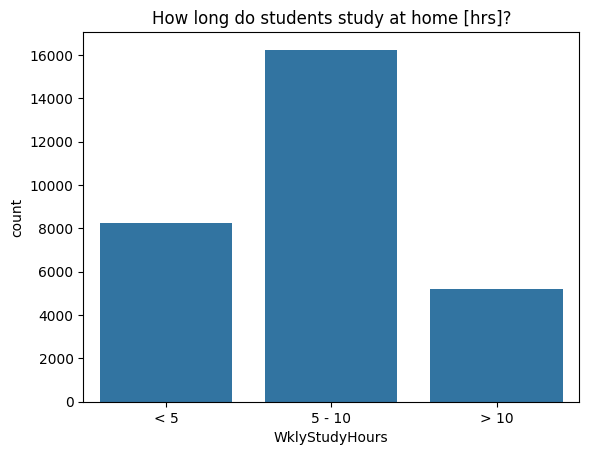

In [17]:
sns.countplot(x=merged_data['WklyStudyHours'], \
             order=['< 5', '5 - 10', '> 10'])
plt.title('How long do students study at home [hrs]?');

In [18]:
display_stats(merged_data, 'WklyStudyHours')

C:\Users\yanh8\AppData\Local\Temp\ipykernel_13132\1492059652.py:14: FutureWarning: The provided callable <function mean at 0x000001C55B5372E0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(np.mean).sort_values(by='MathScore', ascending=False)


,WklyStudyHours (count),WklyStudyHours (%)
WklyStudyHours,,
5 - 10,16246,54.726134
< 5,8238,27.750455
> 10,5202,17.523412


,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
< 5,66.758072,69.897912,68.776159
> 10,66.749327,69.354479,68.194348
5 - 10,66.715622,69.551459,68.388342


Text(0.5, 1.0, 'How often do students practice sports?')

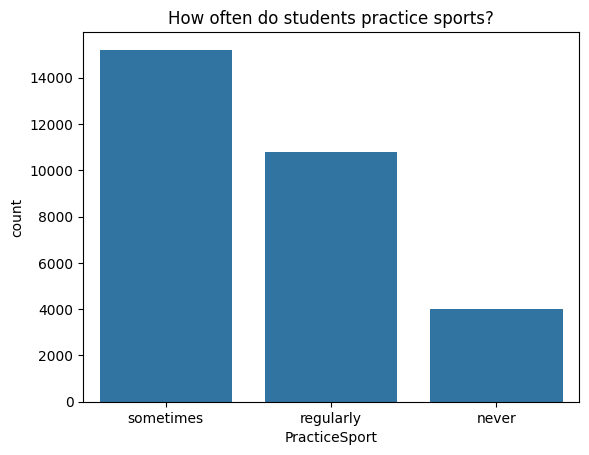

In [19]:
sns.countplot(x=merged_data['PracticeSport'], \
             order = ['sometimes', 'regularly', 'never'])
plt.title('How often do students practice sports?')

In [20]:
display_stats(merged_data, 'PracticeSport')

C:\Users\yanh8\AppData\Local\Temp\ipykernel_13132\1492059652.py:14: FutureWarning: The provided callable <function mean at 0x000001C55B5372E0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(np.mean).sort_values(by='MathScore', ascending=False)


,PracticeSport (count),PracticeSport (%)
PracticeSport,,
sometimes,15213,50.693102
regularly,10793,35.964678
never,4004,13.342219


,MathScore,ReadingScore,WritingScore
PracticeSport,,,
sometimes,66.791954,69.697758,68.542036
regularly,66.704438,69.505420,68.357361
never,66.669081,69.603896,68.442058


<Figure size 1000x600 with 0 Axes>

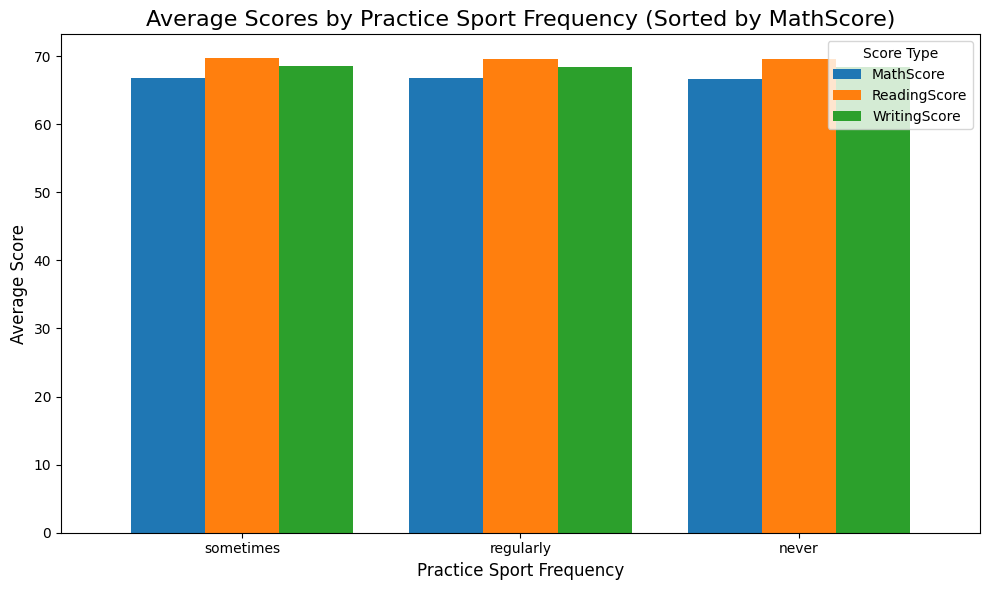

In [21]:
# Calculate the average scores grouped by PracticeSport and sort by MathScore in descending order
sport_summary = (
    merged_data.groupby('PracticeSport')[['MathScore', 'ReadingScore', 'WritingScore']]
    .mean()
    .sort_values(by='MathScore', ascending=False)  # Sort by MathScore in descending order
    .reset_index()  # Reset the index for better plotting
)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sport_summary.set_index('PracticeSport').plot(kind='bar', figsize=(10, 6), width=0.8, legend=True)

# Set chart title and axis labels
plt.title('Average Scores by Practice Sport Frequency (Sorted by MathScore)', fontsize=16)
plt.xlabel('Practice Sport Frequency', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Score Type', fontsize=10)
plt.tight_layout()  # Adjust layout to prevent label overlap

# Display the chart
plt.show()


Text(0.5, 1.0, 'Marital Status of Parent(s)')

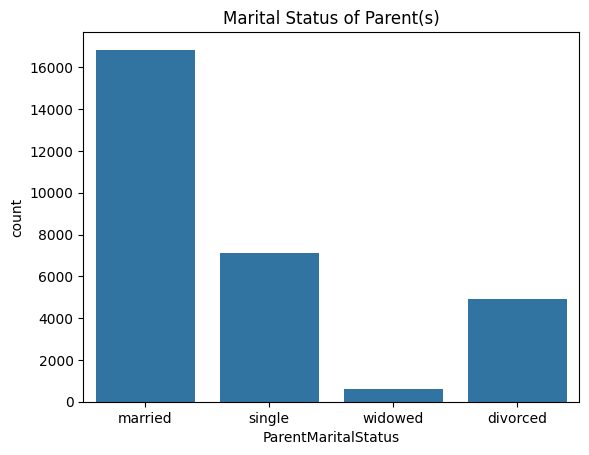

In [22]:
sns.countplot(x=merged_data['ParentMaritalStatus'])
plt.title('Marital Status of Parent(s)')

In [23]:
display_stats(merged_data, 'ParentMaritalStatus')

C:\Users\yanh8\AppData\Local\Temp\ipykernel_13132\1492059652.py:14: FutureWarning: The provided callable <function mean at 0x000001C55B5372E0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(np.mean).sort_values(by='MathScore', ascending=False)


,ParentMaritalStatus (count),ParentMaritalStatus (%)
ParentMaritalStatus,,
married,16844,57.193304
single,7097,24.097654
divorced,4919,16.702319
widowed,591,2.006723


,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
single,66.964774,69.853177,68.681556
divorced,66.727993,69.433828,68.262452
married,66.667181,69.584600,68.426977
widowed,65.766497,69.411168,68.470389


In [ ]:
# Group the merged_data DataFrame by 'Gender' and 'ParentEduc' columns
# Select the columns 'MathScore', 'ReadingScore', and 'WritingScore' to perform aggregation
# Apply the aggregation function np.mean to calculate the mean score for each group
# Style the resulting DataFrame with a gradient color
merged_data.groupby(['Gender', 'ParentEduc'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

C:\Users\yanh8\AppData\Local\Temp\ipykernel_13132\1850901357.py:2: FutureWarning: The provided callable <function mean at 0x000001C55B5372E0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  merged_data.groupby(['Gender', 'ParentEduc'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\


In [25]:
merged_data.groupby(['EthnicGroup', 'LunchType'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

C:\Users\yanh8\AppData\Local\Temp\ipykernel_13132\1094566537.py:1: FutureWarning: The provided callable <function mean at 0x000001C55B5372E0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  merged_data.groupby(['EthnicGroup', 'LunchType'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\


In [26]:
merged_data.groupby(['PracticeSport', 'TestPrep'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

C:\Users\yanh8\AppData\Local\Temp\ipykernel_13132\341155734.py:1: FutureWarning: The provided callable <function mean at 0x000001C55B5372E0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  merged_data.groupby(['PracticeSport', 'TestPrep'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\


C:\Users\yanh8\AppData\Local\Temp\ipykernel_13132\1017060764.py:4: FutureWarning: The provided callable <function mean at 0x000001C55B5372E0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(np.mean)


<Figure size 1000x600 with 0 Axes>

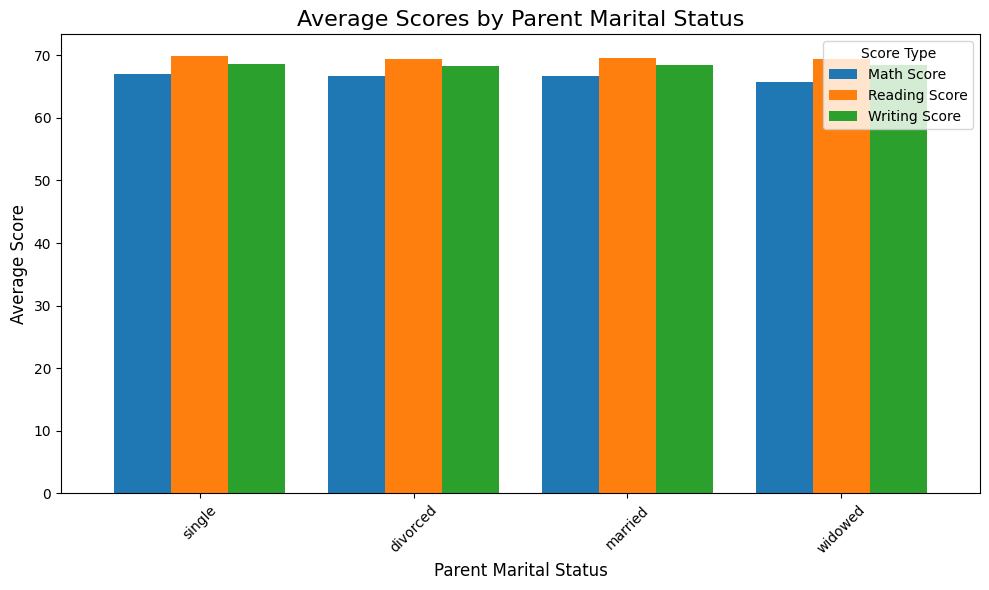

In [27]:
# Grouping by ParentMaritalStatus and calculating mean scores
marital_status_summary = (
    merged_data.groupby('ParentMaritalStatus')[['MathScore', 'ReadingScore', 'WritingScore']]
    .agg(np.mean)
    .sort_values(by='MathScore', ascending=False)  # Sorting by MathScore for better visualization
)

# Visualizing the relationship with a bar plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
marital_status_summary.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Average Scores by Parent Marital Status', fontsize=16)
plt.xlabel('Parent Marital Status', fontsize=12)
plt.ylabel('Average Score', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.legend(['Math Score', 'Reading Score', 'Writing Score'], title='Score Type', fontsize=10)
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()